# **'Health Insurance' project: EDA** 

## [1- Introduction to the project](#1)
- ### [A- Objective of the project](#1.A)
- ### [B- About the dataset](#1.B)
- ### [C- Final considerations](#1.C)

## [2- EDA](#2)
- ### [A- Load basic modules and the csv file](#2.A)
- ### [B- Checking shape, null values and feature types](#2.B)
- ### [C- Continous variables treatment and analysis](#2.C)
- ### [D- Categorical variables treatment and analysis](#2.D)
- ### [E- Multivariate analysis](#2.E)

## [3- Report](#3)

## [4- Data preprocessing](#4)
- ### [A- train_test_split](#4.A)
- ### [B- Dummy variables](#4.B)
- ### [C- StandardScaler](#4.C)
- ### [D- Concatenation](#4.D)
- ### [E- test data wrangling](#4.E)

<a id='1'></a>

---

# 1- Introduction to the project

<a id='1.A'></a>

## A- Objective of the project

* Our client is an Insurance company that has provided Health Insurance to its customers. They need our help in building a model to predict whether the policyholders (customers) from past year will also be interested in `Vehicle Insurance` provided by the company.

* An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

* Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

<a id='1.B'></a>

## B- About the dataset

* The following is a public dataset from kaggle:
    
    - https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?select=test.csv


**Dataset schema information: 'train/test files'**

- `id` **||INTEGER||** Unique ID for the customer.
- `Gender` **||STRING||** Gender of the customer.
- `Age` **||INTEGER||** Age of the customer.
- `Driving_License` **||INTEGER||**	0: Customer does not have DL - 1: Customer already has DL.
- `Region_Code` **||FLOAT||** Unique code for the region of the customer.
- `Previously_Insured` **||INTEGER||** 0: Customer doesn't have Vehicle Insurance - 1: Customer already has Vehicle Insurance. 
- `Vehicle_Age` **||STRING||** Age of the Vehicle.
- `Vehicle_Damage` **||STRING||** 0 : Customer didn't get his/her vehicle damaged in the past - 1: Customer got his/her vehicle damaged in the past. 
- `Annual_Premium` **||FLOAT||** The amount customer needs to pay as premium in the year.
- `Policy_Sales_Channel` **||FLOAT||** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- `Vintage` **||INTEGER||** Number of Days the customer has been associated with the company.
- `Response` **||INTEGER||** 0 : Customer is not interested - 1: Customer is interested. (This feature belongs only to the training data set)

<a id='1.C'></a>

## C- Final considerations (PLEASE READ)

**First consideration**

* Please remember that both this notebook and the notebook called `Models.ipynb` are just the analysis and creation of models in an exploratory way, to finally be able to create the python scripts (`cleaning.py`, `model_search.py` and `clients_predict.py`). 

* It's a good idea to check the `Readme.md` file so you can understand how the order of these scripts should be executed. 

* Our intention is to automate the final model chosen to be able to return a list of clients who have the possibility of contracting the insurance.

* You may find thie notebook a bit short, but again, our intention is to focus on the automation of a machine learning model.

**Second consideration**

* In addition to searching for the best value of `roc_auc`, we will also search for the best `threshold`. 

* For this we will consider a weight to the `false positives (FP)`. For `true positives (TP)` we will consider a gain of `$350` and for `FP` a loss of `$100`. 

* In this way we will seek the `threshold` that maximizes our profit.

<a id='2'></a>

---

# 2- EDA

<a id='2.A'></a>

## A- Load basic modules and the csv file 

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")


# Import sklearn libraries for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../data_raw/train.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<a id='2.B'></a>

## B- Checking shape, null values and feature types

In [3]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset has 381109 rows and 12 columns.


In [4]:
# Calculating amount of null data

data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
data.duplicated().sum()

0

As we can see, there is no null data or duplicated in this dataset. 

In [6]:
# Observing the data type of the dataset.

data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

Some features must have another data type, some transformations will be done later.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


<a id='2.C'></a>

## C- Continous variables treatment and analysis

**Annual_Premium**

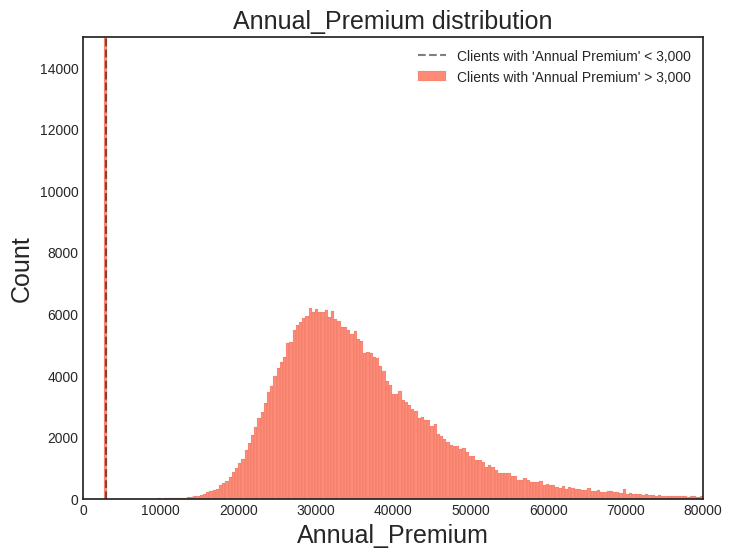

In [8]:
plt.style.use("seaborn-white")
colours = ["#ff6347", "#66CDAA"]
sns.set_palette(sns.color_palette(colours))

fig, ax = plt.subplots(figsize = (8,6))

sns.histplot(data["Annual_Premium"])

plt.xlabel("Annual_Premium", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.title("Annual_Premium distribution", fontsize = 18)
plt.ylim(0, 15000)
plt.xlim(0, 80000)
plt.axvline(x = 3000, color = "black", alpha = 0.5, linestyle = "--")

plt.legend(["Clients with 'Annual Premium' < 3,000", "Clients with 'Annual Premium' > 3,000"])

plt.show()

* There is a large proportion of clients who have an annual premium less than or equal to approximately $3,000.

* We do not know if these values can be possible or are typing errors.

* One option could be to train a model for those customers who have an annual premium lower than said value and another model for those who have an annual premium higher than the cut-off point found.

* Another option would be to replace the values by the median.

* For practical purposes we will use the first option. It may be a controversial decision, but we believe that this subgroup of clients should be analyzed separately.

* We believe that the best way to deal with this problem would be to contact the person who has knowledge of the business.

In [9]:
clients_under_3500 = data[data["Annual_Premium"] < 3500].shape[0]
total_clients = data.shape[0]
print(f"Proportion of clients with a Annual_Premium under 3500: {round(clients_under_3500 /  total_clients * 100, 2)}%")

Proportion of clients with a Annual_Premium under 3500: 17.02%


In [10]:
under_3500 = data[data["Annual_Premium"] <= 3500]
under_3500["Annual_Premium"].unique()

array([2630.])

* We observe that all the cases correspond to an annual premium of `$,2630`. 

* We do not know what this pre-fixed price is due to.

In [11]:
data = data[data["Annual_Premium"] > 3500]

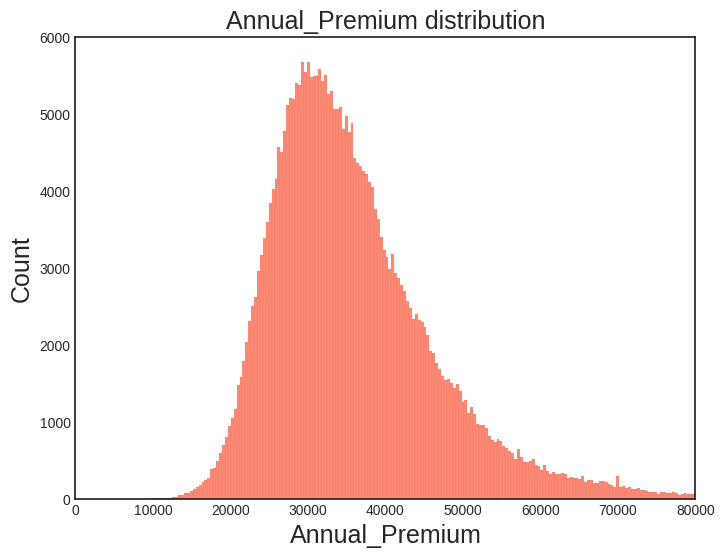

In [12]:
fig, ax = plt.subplots(figsize = (8,6))
plt.style.use("seaborn-white")

sns.histplot(data["Annual_Premium"])

plt.xlabel("Annual_Premium", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.title("Annual_Premium distribution", fontsize = 18)
plt.ylim(0, 6000)
plt.xlim(0, 80000)

plt.show()

In [13]:
data["Annual_Premium_log"] = np.log(data["Annual_Premium"])

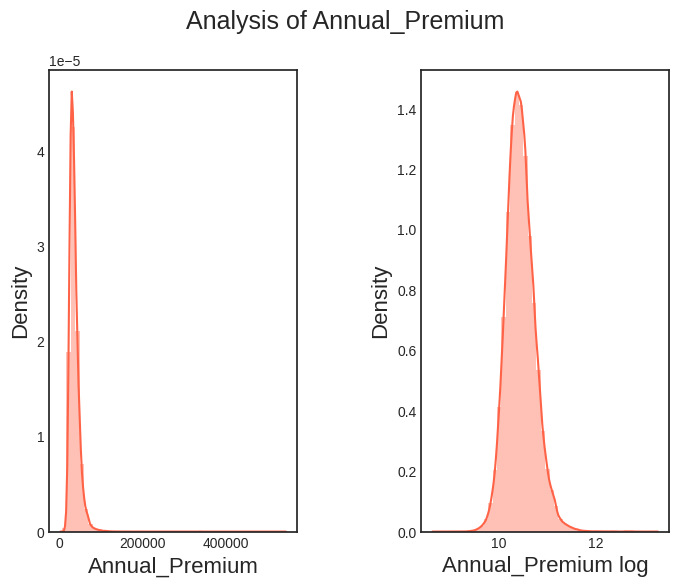

In [14]:
fig, ax = plt.subplots(figsize = (8,6), nrows = 1, ncols = 2, gridspec_kw = {"hspace": 0.25, "wspace": 0.5})
plt.style.use("seaborn-white")
#colours = ["#ff6347", "#66CDAA"]
#sns.set_palette(sns.color_palette(colours))

sns.distplot(data["Annual_Premium"], ax = ax[0])
sns.distplot(data["Annual_Premium_log"], ax = ax[1])


ax[0].set_xlabel("Annual_Premium", fontsize = 16)
ax[0].set_ylabel("Density", fontsize = 16)

ax[1].set_xlabel("Annual_Premium log", fontsize = 16)
ax[1].set_ylabel("Density", fontsize = 16)

plt.suptitle("Analysis of Annual_Premium \n \n", fontsize = 18)

plt.show()

* Given the distribution, it is decided to use log transformation. 

* Log transformation allows us to potentially obtain a bell-shaped distribution. The idea is that taking the log of the data can restore symmetry to the data.

**Age**

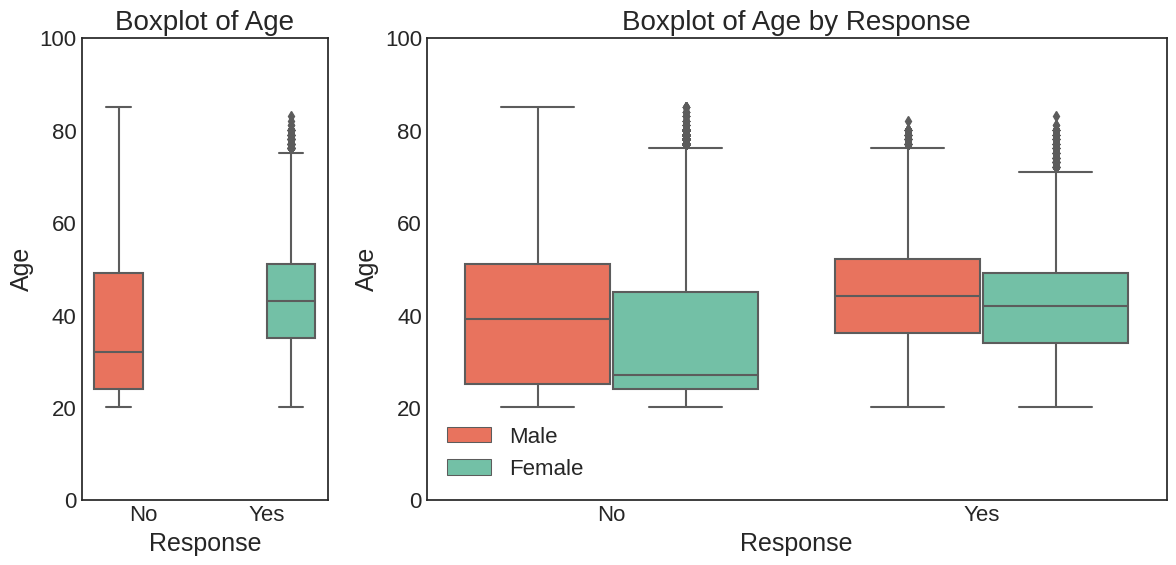

In [15]:
fig, ax = plt.subplots(figsize = (14,6), nrows = 1, ncols = 2, gridspec_kw = {"width_ratios": [1, 3]})
plt.style.use("seaborn-white")
colours = ["#ff6347", "#66CDAA"]
sns.set_palette(sns.color_palette(colours))

sns.boxplot(x = "Response", y = "Age", data = data, hue = "Response", ax = ax[0])
sns.boxplot(x = "Response", y = "Age", data = data, hue = "Gender", ax = ax[1])

ax[0].set_title("Boxplot of Age", fontsize = 20)
ax[0].set_xlabel("Response", fontsize = 18)
ax[0].set_xticks(ticks = [0,1], labels = ["No", "Yes"], fontsize = 16)
ax[0].set_ylabel("Age", fontsize = 18)
ax[0].set_yticks(ticks = range(0, 120, 20), labels = range(0, 120, 20), fontsize = 16)
ax[0].legend("", fontsize = 16)

ax[1].set_title("Boxplot of Age by Response", fontsize = 20)
ax[1].set_xlabel("Response", fontsize = 18)
ax[1].set_xticks(ticks = [0,1], labels = ["No", "Yes"], fontsize = 16)
ax[1].set_ylabel("Age", fontsize = 18)
ax[1].set_yticks(ticks = range(0, 120, 20), labels = range(0, 120, 20), fontsize = 16)
ax[1].legend(fontsize = 16)

plt.show()

* It is observed that the clients who take out the insurance have a higher median compared to those who do not (Left graph).

* In relation to gender, men who take out the insurance have a higher median compared to women (Right graph).

**Vintage**

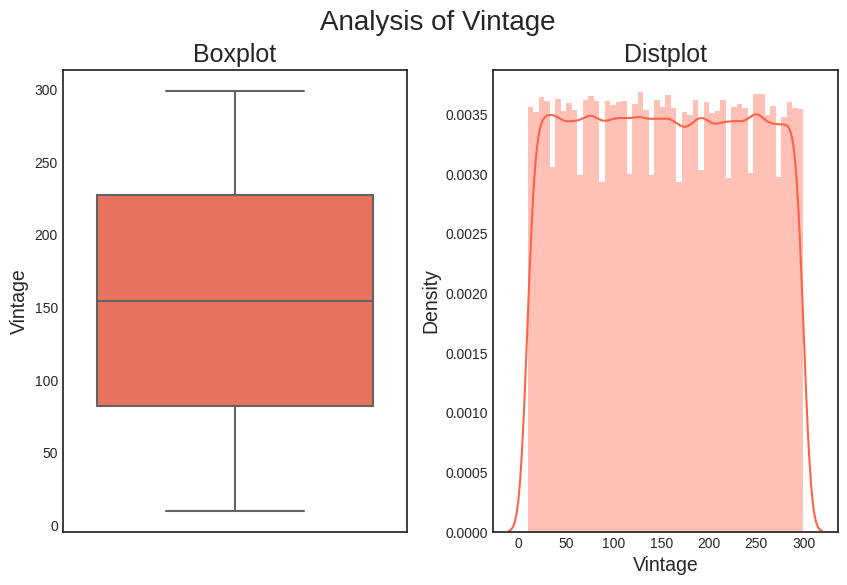

In [16]:
fig, ax = plt.subplots(figsize = (10,6), nrows = 1, ncols = 2, gridspec_kw = {"wspace": 0.25})
plt.style.use("seaborn-white")

sns.boxplot(y = "Vintage", data = data, ax = ax[0])
sns.distplot(data["Vintage"], ax = ax[1])

ax[0].set_title("Boxplot", fontsize = 18)
ax[0].set_ylabel("Vintage", fontsize = 14)

ax[1].set_title("Distplot", fontsize = 18)
ax[1].set_ylabel("Density", fontsize = 14)
ax[1].set_xlabel("Vintage", fontsize = 14)

plt.suptitle("Analysis of Vintage", fontsize = 20)

plt.show()

In this case, a uniform distribution is observed, so each element has the same probability of appearing.

<a id='2.D'></a>

## D- Categorical variables treatment and analysis

**Demographic variables**

In [17]:
def categorical_graph(dataframe, col, color1, color2, title):
    absolute = dataframe[col].value_counts()
    percentage = dataframe[col].value_counts(normalize = True).round(2) * 100

    def addlabels_abs(a, b):
        for i in range(len(a)):
            plt.text(a.index[i], b[i], '{:,}'.format(a[i]), ha = "center", fontsize = 20, bbox = dict(facecolor = "white", alpha = .75))

    plt.style.use("seaborn-white")
    sns.set_palette("vlag")
    fig, ax = plt.subplots(figsize = (8, 6))

    colors = [color1, color2]
    sns.set_palette(sns.color_palette(colors))

    ax.bar(percentage.index, percentage, color = colors)

    addlabels_abs(absolute, percentage)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.title(title, fontsize = 20)
    plt.ylim(0, 100)

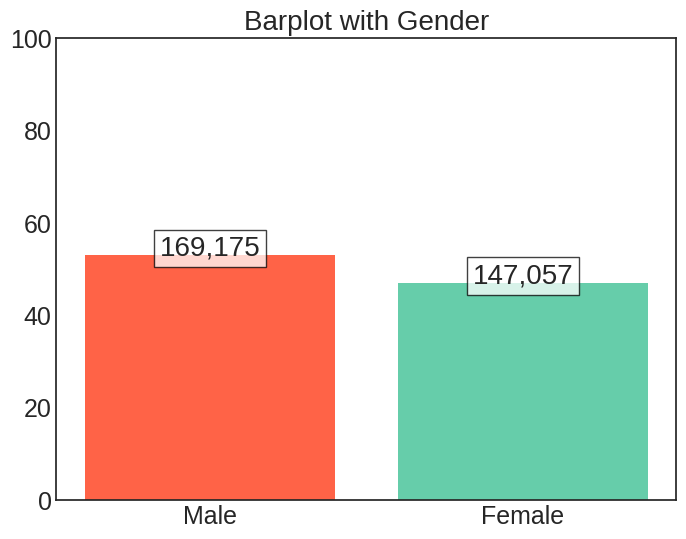

In [18]:
categorical_graph(data, "Gender", "#ff6347", "#66CDAA",  "Barplot with Gender")

While there are more men in this data set, it doesn't seem to be a huge difference.

In [19]:
data.groupby("Response")["Gender"].value_counts(normalize = True).round(2).to_frame()

Gender
Response Gender        
0        Male      0.52
         Female    0.48
1        Male      0.61
         Female    0.39

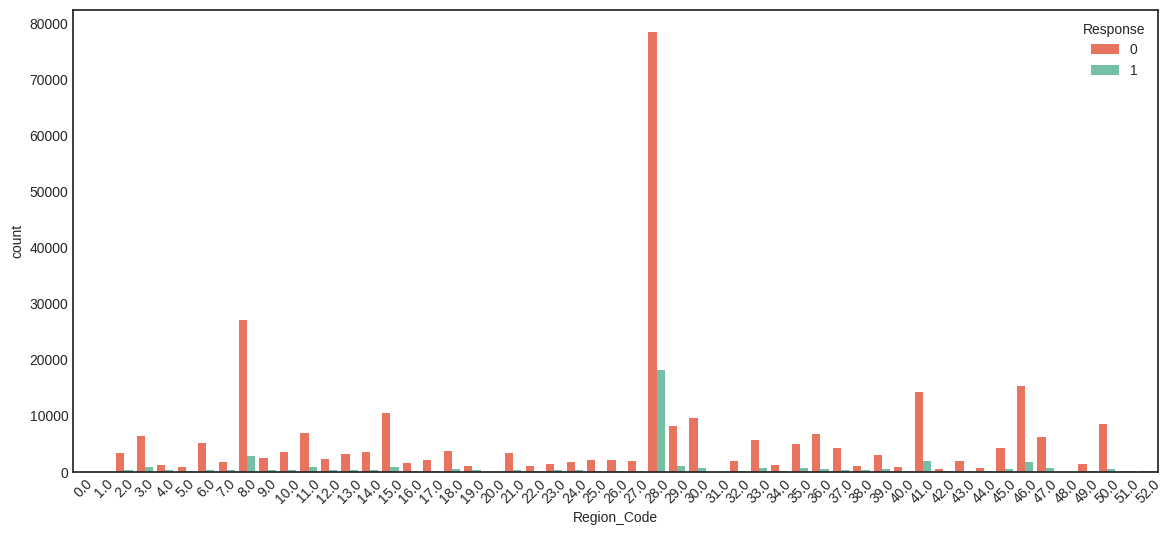

In [20]:
fig, ax = plt.subplots(figsize = (14, 6))

sns.countplot(data=data, x="Region_Code", hue="Response")

plt.xticks(rotation = 45)

plt.show()

* In relation to demographic variables:
    
     - Most of the clients who took out insurance were men (61%). 
     
     - Most of the clients who took out insurance belong to region 28.0.
    
     - On the other hand, those who do not contract the insurance do not seem to have a distinction regarding gender.
     
     - Most of them belongs to the region code 28.0 and 8.0.

**Vehicle features**

In [21]:
list_categoricals = ["Vehicle_Age", "Vehicle_Damage"]
for i in list_categoricals:
    print(f"Column: {i}")
    print(data.groupby("Response")[i].value_counts(normalize = True).round(2).to_frame().rename(columns = {i: "Percentage"}).sort_values(by = ["Response", "Percentage"], ascending = False))
    print("-----" * 9)

Column: Vehicle_Age
                      Percentage
Response Vehicle_Age            
1        1-2 Year           0.74
         < 1 Year           0.16
         > 2 Years          0.11
0        < 1 Year           0.50
         1-2 Year           0.47
         > 2 Years          0.03
---------------------------------------------
Column: Vehicle_Damage
                         Percentage
Response Vehicle_Damage            
1        Yes                   0.98
         No                    0.02
0        No                    0.58
         Yes                   0.42
---------------------------------------------


* In relation to vehicle variables:
    
    - Customers who have had previous damage to their vehicle and at the same time its age is between 1-2 years usually take out insurance.
    
    - The pattern of those who do not take out insurance in relation to the variables related to the vehicle is not very clear.

**Policy features**

In [22]:
list_categoricals = ["Previously_Insured", "Driving_License"]
for i in list_categoricals:
    print(f"Column: {i}")
    print(data.groupby("Response")[i].value_counts(normalize = True).round(2).to_frame().rename(columns = {i: "Percentage"}).sort_values(by = ["Response", "Percentage"], ascending = False))
    print("-----" * 9)

Column: Previously_Insured
                             Percentage
Response Previously_Insured            
1        0                         1.00
         1                         0.00
0        1                         0.54
         0                         0.46
---------------------------------------------
Column: Driving_License
                          Percentage
Response Driving_License            
1        1                       1.0
         0                       0.0
0        1                       1.0
         0                       0.0
---------------------------------------------


In [23]:
data[data["Response"] == 1].groupby("Policy_Sales_Channel").size().sort_values(ascending = False).head()

Policy_Sales_Channel
26.0     13907
124.0    12023
152.0     3418
122.0     1552
154.0     1243
dtype: int64

In [24]:
data[data["Response"] == 0].groupby("Policy_Sales_Channel").size().sort_values(ascending = False).head()

Policy_Sales_Channel
152.0    118691
26.0      53594
124.0     49998
160.0     15948
122.0      7030
dtype: int64

* In relation to vehicle variables:

    - Most customers who buy insurance for their vehicle have previously had insurance.

    - The majority of clients who take out have used the the `Policy_Sales_Channel == 26.0` and `Policy_Sales_Channel == 124.0`.  
      
    - It is noteworthy that a large proportion of customers who have not taken out the insurance have used the `Policy_Sales_Channel == 152.0`.

**Data transformation: 'Policy_Sales_Channel'**

This columns has over 148 different values, we grouped into 'others' category the values that are less than 2%.

In [25]:
data["Policy_Sales_Channel"].nunique()

148

In [26]:
data["Policy_Sales_Channel"] = np.where((data["Policy_Sales_Channel"] != 152.0)\
                                      & (data["Policy_Sales_Channel"] != 26.0)\
                                      & (data["Policy_Sales_Channel"] != 160.0)\
                                      & (data["Policy_Sales_Channel"] != 122.0), "Other", data["Policy_Sales_Channel"])

In [27]:
data["Policy_Sales_Channel"].nunique()

5

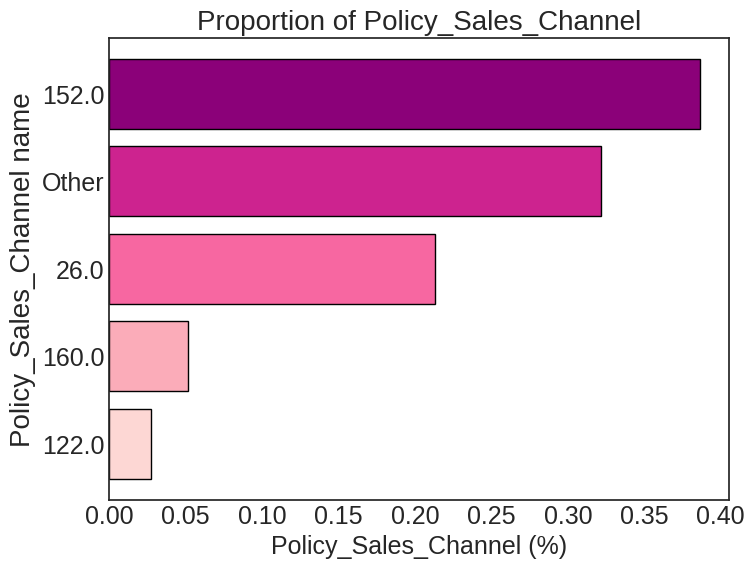

In [28]:
Policy_Sales_Channel_sort = data["Policy_Sales_Channel"].value_counts(normalize=True).sort_values(ascending = True)

fig, ax = plt.subplots(figsize = (8, 6))

ax.barh(Policy_Sales_Channel_sort.index, Policy_Sales_Channel_sort, color = sns.color_palette("RdPu", 5), edgecolor = "black")
plt.ylabel("Policy_Sales_Channel name", fontsize = 20)
plt.xlabel("Policy_Sales_Channel (%)", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Proportion of Policy_Sales_Channel", fontsize = 20)

plt.show();

**Data transformation: 'Region_Code'**

This columns has over 53 different values, we grouped into 'others' category the values that are not within the top 10

In [29]:
data["Region_Code"].nunique()

53

In [30]:
data["Region_Code"] = np.where((data["Region_Code"] != 28.0)\
                             & (data["Region_Code"] != 8.0)\
                             & (data["Region_Code"] != 46.0)\
                             & (data["Region_Code"] != 41.0)\
                             & (data["Region_Code"] != 15.0)\
                             & (data["Region_Code"] != 30.0)\
                             & (data["Region_Code"] != 29.0)\
                             & (data["Region_Code"] != 50.0)\
                             & (data["Region_Code"] != 3.0)\
                             & (data["Region_Code"] != 11.0), "Other", data["Region_Code"])

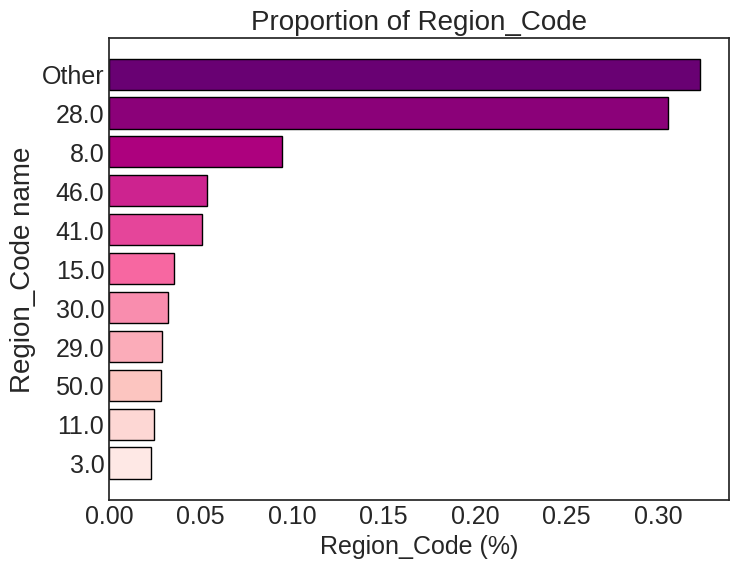

In [31]:
Region_Code_sort = data["Region_Code"].value_counts(normalize=True).sort_values(ascending = True)

fig, ax = plt.subplots(figsize = (8, 6))

ax.barh(Region_Code_sort.index, Region_Code_sort, color = sns.color_palette("RdPu", 11), edgecolor = "black")
plt.ylabel("Region_Code name", fontsize = 20)
plt.xlabel("Region_Code (%)", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Proportion of Region_Code", fontsize = 20)

plt.show();

**Response**

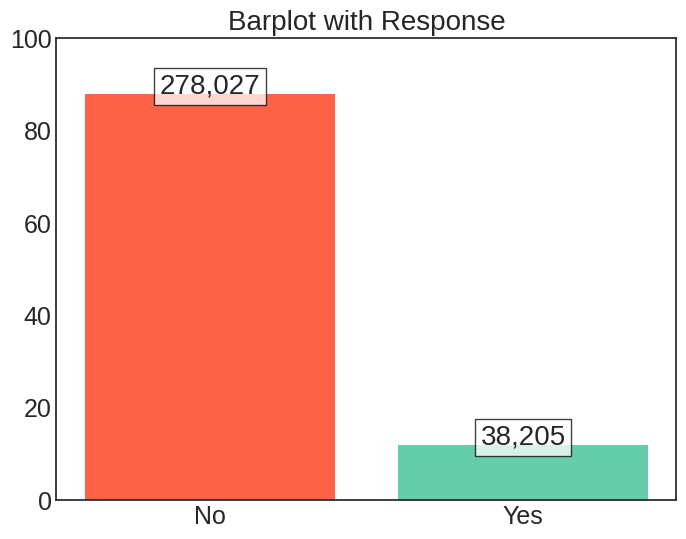

In [32]:
categorical_graph(data, "Response", "#ff6347", "#66CDAA",  "Barplot with Response")
plt.xticks(ticks = [0,1], labels = ["No", "Yes"]);

It is noteworthy that our class to predict called Responde presents us with an unbalanced class problem. Therefore, for example, metrics such as accuracy will not help us when evaluating the performance of the model.

<a id='2.E'></a>

## E- Multivariate analysis

**'Vintage' - 'Annual_Premium' - 'Age' relationship with 'Response'**

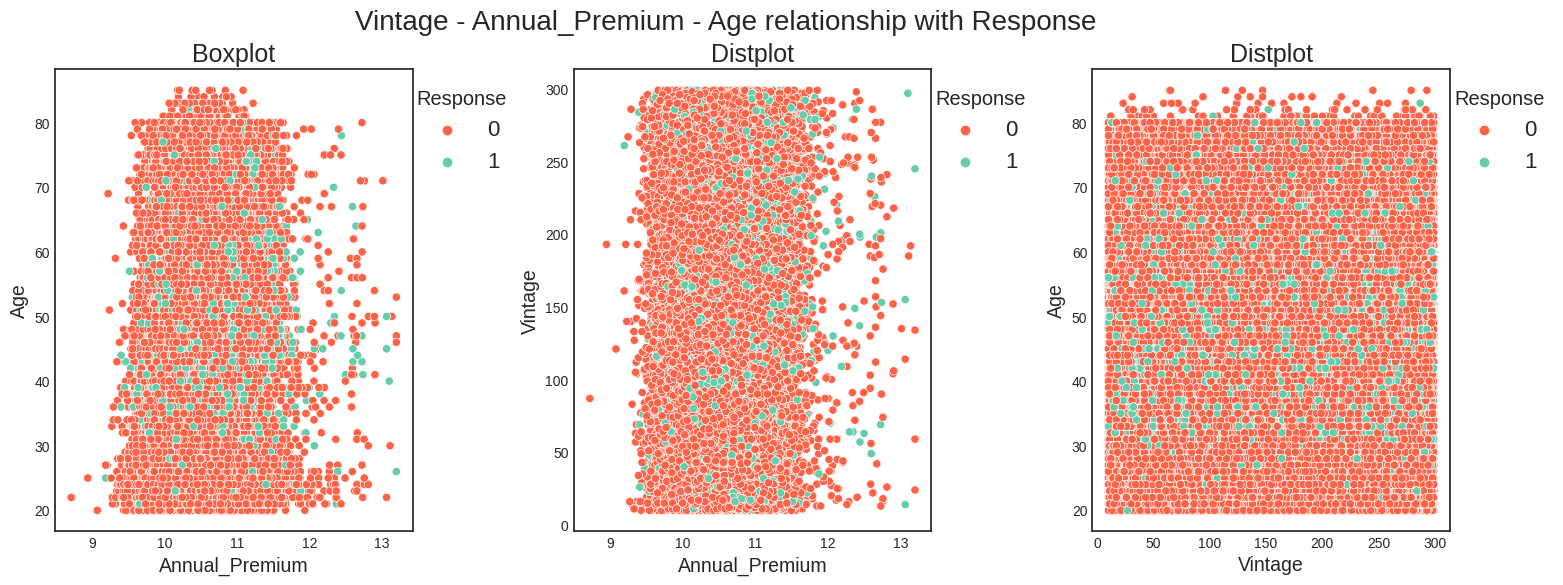

In [33]:
fig, ax = plt.subplots(figsize = (18,6), nrows = 1, ncols = 3, gridspec_kw = {"wspace": 0.45})
plt.style.use("seaborn-white")
colours = ["#ff6347", "#66CDAA"]
sns.set_palette(sns.color_palette(colours))

sns.scatterplot(x = data["Annual_Premium_log"], y = data["Age"], hue = data["Response"], ax = ax[0])
sns.scatterplot(x = data["Annual_Premium_log"], y = data["Vintage"], hue = data["Response"], ax = ax[1])
sns.scatterplot(x = data["Vintage"], y = data["Age"], hue = data["Response"], ax = ax[2])

ax[0].set_title("Boxplot", fontsize = 18)
ax[0].set_xlabel("Annual_Premium", fontsize = 14)
ax[0].set_ylabel("Age", fontsize = 14)
ax[0].legend(fontsize = 16, bbox_to_anchor = (1.32, 1), loc = "upper right", title = "Response", title_fontsize = "x-large")

ax[1].set_title("Distplot", fontsize = 18)
ax[1].set_xlabel("Annual_Premium", fontsize = 14)
ax[1].set_ylabel("Vintage", fontsize = 14)
ax[1].legend(fontsize = 16, bbox_to_anchor = (1.32, 1), loc = "upper right", title = "Response", title_fontsize = "x-large")

ax[2].set_title("Distplot", fontsize = 18)
ax[2].set_xlabel("Vintage", fontsize = 14)
ax[2].set_ylabel("Age", fontsize = 14)
ax[2].legend(fontsize = 16, bbox_to_anchor = (1.32, 1), loc = "upper right", title = "Response", title_fontsize = "x-large")

plt.suptitle("Vintage - Annual_Premium - Age relationship with Response \n", fontsize = 20)

plt.show()

* Regarding the relationship between the numerical variables and the response variable, no specific pattern is observed.

* Perhaps in relation to age, the majority of users who take out insurance for their vehicle are between 30 and 60 years of age.

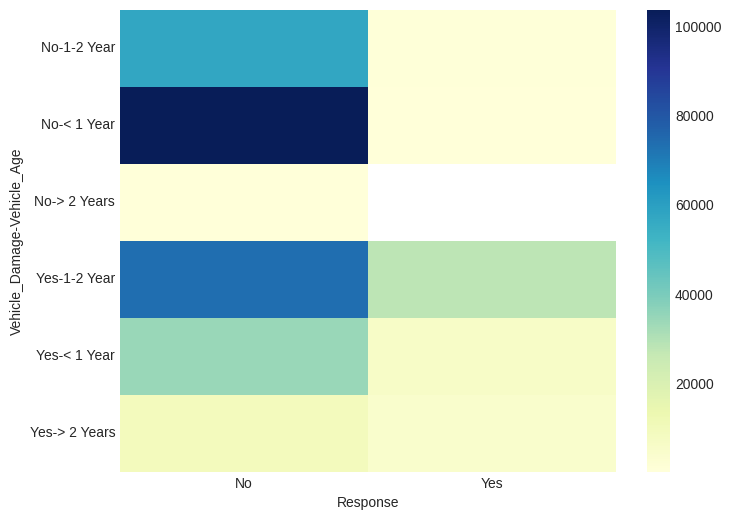

In [34]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.heatmap(data.groupby(["Vehicle_Damage", "Vehicle_Age", "Response"]).size().unstack(), cmap = "YlGnBu")
plt.xticks(ticks = [0.5,1.5], labels = ["No", "Yes"]);

plt.show()

* It is observed that the majority of people who take out vehicle insurance have had previous damage to their vehicle and its age is between 1 and 2 years.

* In turn, those who do not take out vehicle insurance have not suffered a previous accident and the age of the vehicle is less than 1 year.

In [35]:
model = smf.logit(formula = "Response ~ C(Vehicle_Damage) + C(Vehicle_Age)", data = data)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.279214
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:               316232
Model:                          Logit   Df Residuals:                   316228
Method:                           MLE   Df Model:                            3
Date:                Tue, 07 Feb 2023   Pseudo R-squ.:                  0.2424
Time:                        13:24:34   Log-Likelihood:                -88297.
converged:                       True   LL-Null:                   -1.1654e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -5.0318      0.039   -128.079      0.000   

Through a logistic regression, the statistically significant influence of the categorical variable `Vehicle_Damage == 'Yes'` can be observed.

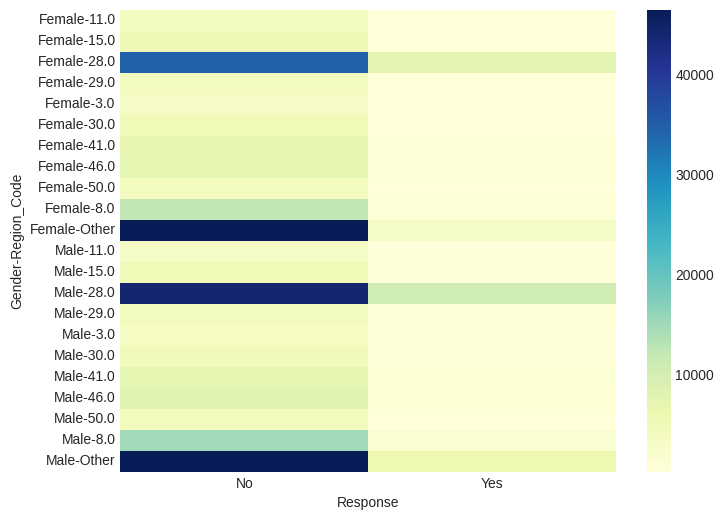

In [36]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.heatmap(data.groupby(["Gender", "Region_Code", "Response"]).size().unstack(), cmap = "YlGnBu")
plt.xticks(ticks = [0.5,1.5], labels = ["No", "Yes"]);

plt.show()

* In this case, the people who usually take out insurance for their vehicle are usually men who live in region 28.

* Conversely, those who do not take out insurance tend to be men and women who live in `Region_Code == 'Other'` and `Region_Code == '28.0'.

In [37]:
model = smf.logit(formula = "Response ~ C(Gender) + C(Region_Code)", data = data)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.357601
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:               316232
Model:                          Logit   Df Residuals:                   316220
Method:                           MLE   Df Model:                           11
Date:                Tue, 07 Feb 2023   Pseudo R-squ.:                 0.02969
Time:                        13:24:37   Log-Likelihood:            -1.1308e+05
converged:                       True   LL-Null:                   -1.1654e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.3410      0.038    -61.725      0.000      -2.415   

Although there are statistically significant relationships, they do not seem to have a great impact on our response variable.

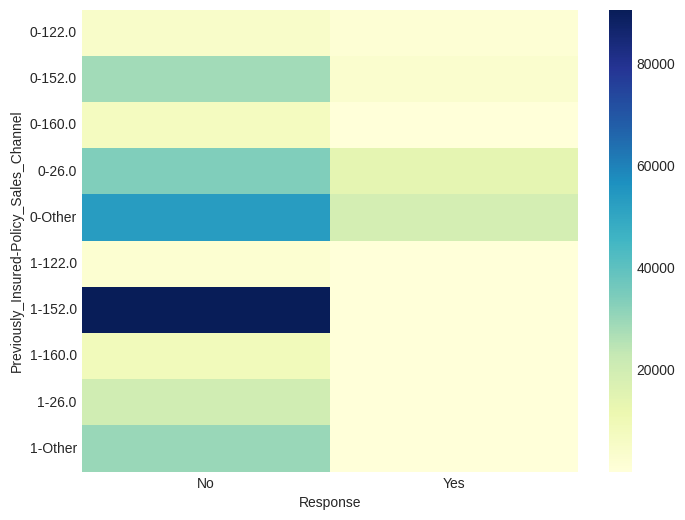

In [38]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.heatmap(data.groupby(["Previously_Insured", "Policy_Sales_Channel", "Response"]).size().unstack(), cmap = "YlGnBu")
plt.xticks(ticks = [0.5,1.5], labels = ["No", "Yes"]);

plt.show()

* Finally, taking into account the 'Policy' variables we observe that the people who take out the insurance have not been previously insured and have `Policy_Sales_Channel == 'Other'`.

* But most of those who do not take out the insurance are previously insured and `Policy_Sales_Channel == '152'` is used.

In [39]:
model = smf.logit(formula = "Response ~ C(Previously_Insured) + C(Policy_Sales_Channel)", data = data)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.274279
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:               316232
Model:                          Logit   Df Residuals:                   316226
Method:                           MLE   Df Model:                            5
Date:                Tue, 07 Feb 2023   Pseudo R-squ.:                  0.2558
Time:                        13:24:39   Log-Likelihood:                -86736.
converged:                       True   LL-Null:                   -1.1654e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -1.1432      0.029    -39.2

We observe how having previously been insured and using a Policy Sale Channel of 160 has a negative influence when purchasing insurance for your vehicle.

<a id='3'></a>

---

# 3- Report

<a id='3.A'></a>

* It was observed that customers who take out insurance for their vehicle have an approximate median age of 40 years, are mostly men and live in de region 28.

* Apparently there is no relationship between the days that the client is associated with the company and the insurance contract.

* The same occurs with the amount that the client must pay as a premium in the year.

* The majority of customers who have taken out insurance have had some damage to their vehicle previously and the age of the vehicle was found to be between 1 and 2 years old.

* Finally, those who contracted the insurance did not previously have insurance, regardless of the policy channel used.

<a id='4'></a>

---

# 4- Data preprocessing

Before carrying out the pre-processing, we drop the columns that we do not consider to have any interference when carrying out the modeling.

In [40]:
data = data.drop(["id", "Region_Code", "Annual_Premium"], axis = 1)

<a id='4.A'></a>

## A- train_test_split

In [41]:
X = data.drop("Response", axis = 1)
y = data.Response

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 123)

In [43]:
X_train.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium_log
230085,Male,29,1,0,< 1 Year,Yes,26.0,140,10.142937
265958,Male,37,1,0,1-2 Year,Yes,Other,267,10.205627
241780,Female,27,1,0,< 1 Year,Yes,152.0,150,10.283053
34733,Male,23,1,1,< 1 Year,No,152.0,252,10.373429
342162,Male,56,1,1,1-2 Year,No,Other,181,10.340128


In [44]:
y_train.head()

230085    0
265958    1
241780    1
34733     0
342162    0
Name: Response, dtype: int64

We generate the lists with numeric and categorical variables.

In [45]:
X_train["Previously_Insured"] = X_train["Previously_Insured"].astype("object")
X_val["Previously_Insured"] = X_val["Previously_Insured"].astype("object")

In [46]:
X_train["Driving_License"] = X_train["Driving_License"].astype("object")
X_val["Driving_License"] = X_val["Driving_License"].astype("object")

In [47]:
categoricals_train = X_train.select_dtypes("object")
categoricals_val = X_val.select_dtypes("object")
numericals_train = X_train.select_dtypes(exclude = "object")
numericals_val = X_val.select_dtypes(exclude = "object")

In [48]:
categoricals_train.head(1)

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
230085,Male,1,0,< 1 Year,Yes,26.0


In [49]:
numericals_train.head(1)

,Age,Vintage,Annual_Premium_log
230085,29,140,10.142937


<a id='4.B'></a>

## B- Dummy variables

In [50]:
categoricals_train.head()

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
230085,Male,1,0,< 1 Year,Yes,26.0
265958,Male,1,0,1-2 Year,Yes,Other
241780,Female,1,0,< 1 Year,Yes,152.0
34733,Male,1,1,< 1 Year,No,152.0
342162,Male,1,1,1-2 Year,No,Other


In [51]:
type(categoricals_train.loc[342162, "Policy_Sales_Channel"])

str

In [52]:
def create_dummy(dataframe):
    enc = OneHotEncoder(drop = "first", handle_unknown = "ignore")        
    enc_fit= enc.fit_transform(dataframe).toarray()
    enc_fit_df = pd.DataFrame(enc_fit, columns = enc.get_feature_names_out(), index = dataframe.index)
    
    return enc_fit_df

In [53]:
categoricals_dummy_train = create_dummy(categoricals_train)
categoricals_dummy_val = create_dummy(categoricals_val)
categoricals_dummy_train.head()

,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Policy_Sales_Channel_152.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_26.0,Policy_Sales_Channel_Other
230085,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
265958,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
241780,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
34733,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
342162,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<a id='4.C'></a>

## C- StandardScaler

In [54]:
scaler = StandardScaler()
numericals_train_std = scaler.fit_transform(numericals_train)
numericals_val_std = scaler.transform(numericals_val)
numericals_train_std_df = pd.DataFrame(numericals_train_std, columns = numericals_train.columns, index = X_train.index)
numericals_val_std_df = pd.DataFrame(numericals_val_std, columns = numericals_val.columns, index = X_val.index)

<a id='4.C'></a>

## D- Concatenation

Concatenating standard scaler of numericals variables with one hot encoding of categorical variables.

In [55]:
train_model = pd.concat([numericals_train_std_df, categoricals_dummy_train, y_train], axis = 1)
val_model = pd.concat([numericals_val_std_df, categoricals_dummy_val, y_val], axis = 1)

In [56]:
train_model.to_csv("../documents/train_model_notebook.csv", index = False)
val_model.to_csv("../documents/val_model_notebook.csv", index = False)

In [57]:
train_model = pd.read_csv("../documents/train_model_notebook.csv")
print("Shape:", train_model.shape)
train_model.head()

Shape: (252985, 14)


,Age,Vintage,Annual_Premium_log,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Policy_Sales_Channel_152.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_26.0,Policy_Sales_Channel_Other,Response
0,-0.600814,-0.170899,-1.065984,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,-0.088204,1.346765,-0.851296,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
2,-0.728967,-0.051398,-0.586140,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1
3,-0.985272,1.167513,-0.276639,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,1.129246,0.319056,-0.390680,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [58]:
train_model.Response.value_counts(normalize = True)

0    0.879187
1    0.120813
Name: Response, dtype: float64

In [59]:
val_model = pd.read_csv("../documents/val_model_notebook.csv")
print("Shape:", val_model.shape)
val_model.head()

Shape: (63247, 14)


,Age,Vintage,Annual_Premium_log,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Policy_Sales_Channel_152.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_26.0,Policy_Sales_Channel_Other,Response
0,-0.793043,-0.601103,-0.470270,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,-0.600814,-0.959606,-1.179571,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1.962238,0.940461,-1.274637,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0
3,-1.049348,-0.744504,-0.982115,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,-1.049348,-1.246408,-0.647128,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0


In [60]:
val_model.Response.value_counts(normalize = True)

0    0.879188
1    0.120812
Name: Response, dtype: float64

## E- test data wrangling

In [61]:
test = pd.read_csv('../data_raw/test.csv')
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [62]:
test = test[test["Annual_Premium"] > 3500]

In [63]:
test["Annual_Premium_log"] = np.log(test["Annual_Premium"])

In [64]:
test = test.drop(["Annual_Premium", "Region_Code"], axis = 1)

In [65]:
test["Policy_Sales_Channel"] = test["Policy_Sales_Channel"].astype("object")
test["Policy_Sales_Channel"] = np.where((test["Policy_Sales_Channel"] != 152.0)\
                                      & (test["Policy_Sales_Channel"] != 26.0)\
                                      & (test["Policy_Sales_Channel"] != 160.0)\
                                      & (test["Policy_Sales_Channel"] != 122.0), "Other", test["Policy_Sales_Channel"].astype("str"))

In [66]:
test["Driving_License"] = test["Driving_License"].astype("object")
test["Previously_Insured"] = test["Previously_Insured"].astype("object")

In [67]:
categoricals_test = test.select_dtypes("object")
numericals_test = test.select_dtypes(exclude = "object")

In [68]:
categoricals_test.head(1)

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
0,Male,1,1,< 1 Year,No,152.0


In [69]:
numericals_test.head(1)

,id,Age,Vintage,Annual_Premium_log
0,381110,25,53,10.485312


In [70]:
categoricals_dummy_test = create_dummy(categoricals_test)
categoricals_dummy_test.head()

,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Policy_Sales_Channel_152.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_26.0,Policy_Sales_Channel_Other
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [71]:
numericals_test.head()

,id,Age,Vintage,Annual_Premium_log
0,381110,25,53,10.485312
1,381111,40,111,10.427091
2,381112,47,199,10.597884
3,381113,24,187,10.528249
4,381114,27,297,10.986935


In [72]:
numericals_test_std = scaler.transform(numericals_test.loc[:, "Age": "Annual_Premium_log"])
numericals_test_std_df = pd.DataFrame(numericals_test_std, 
                                      columns = numericals_test.loc[:, "Age":"Annual_Premium_log"].columns, 
                                      index = numericals_test.loc[:, "Age": "Annual_Premium_log"].index)

In [73]:
numericals_test_std_df.head()

,Age,Vintage,Annual_Premium_log
0,-0.857119,-1.210558,0.106519
1,0.104025,-0.517452,-0.092865
2,0.552559,0.534157,0.492036
3,-0.921196,0.390756,0.253562
4,-0.728967,1.705268,1.824390


In [74]:
test_model = pd.concat([test["id"], numericals_test_std_df, categoricals_dummy_test], axis = 1)

In [75]:
print("Test shape:", test_model.shape)
test_model.head()

Test shape: (105426, 14)


,id,Age,Vintage,Annual_Premium_log,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Policy_Sales_Channel_152.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_26.0,Policy_Sales_Channel_Other
0,381110,-0.857119,-1.210558,0.106519,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,381111,0.104025,-0.517452,-0.092865,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,381112,0.552559,0.534157,0.492036,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,381113,-0.921196,0.390756,0.253562,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,381114,-0.728967,1.705268,1.824390,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [76]:
test_model.to_csv("../documents/test_model_notebook.csv", index = False)

In [77]:
test_model = pd.read_csv("../documents/test_model_notebook.csv")
print("Shape:", test_model.shape)
test_model.head()

Shape: (105426, 14)


,id,Age,Vintage,Annual_Premium_log,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Policy_Sales_Channel_152.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_26.0,Policy_Sales_Channel_Other
0,381110,-0.857119,-1.210558,0.106519,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,381111,0.104025,-0.517452,-0.092865,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,381112,0.552559,0.534157,0.492036,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,381113,-0.921196,0.390756,0.253562,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,381114,-0.728967,1.705268,1.824390,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
